# Simple viewer for Grads files

In [1]:
%matplotlib inline

import ipywidgets as widgets
from ipyfilechooser import FileChooser
from os import path

import src.read_grads as read_grads
import src.widget_selection as ws
import src.grads_plot as grads_plot

## Select a grads control file (.ctl) by clicking on the 'Select' button

Note that the .ctl and the .grd files must be in the same directory.

Test files can be found in the ```data``` directory.

In [2]:
# Create and display a FileChooser widget
# fc = FileChooser('D:\sbranchett\My Documents\Jupyter_GrADS\data')
fc = FileChooser('.')
display(fc)

FileChooser(path='.', filename='', show_hidden='False')

In [3]:
filename = "data/attm101.ctl"
ctl_file = fc.selected
if ctl_file == None:
    print('!!! PLEASE SELECT A CONTROL FILE !!!')
elif ctl_file[-4:] != ".ctl":
    print('!!! PLEASE SELECT A CONTROL FILE WITH EXTENSION .ctl !!!')
else:
    filename = ctl_file
print('Selected control file is',filename)

Selected control file is D:\sbranchett\My Documents\Jupyter_GrADS\data\soilw_7908clim.t30.land.ctl


## Extract the metadata, find the results file and extract the data

In [4]:
metadata, varsKeys = read_grads.read_metadata(filename)

first_attempt = filename[:-4]+"_"+metadata["TDEF"][0][-4:]+".grd"
second_attempt = filename[:-4]+".grd"

if path.exists(first_attempt):
    grads_filename = first_attempt
elif path.exists(second_attempt):
    grads_filename = second_attempt
else:
    print("!!! COULD NOT FIND THE .grd DATA FILE !!!")
    grads_filename = "!!!"

print('Name of grads file is:',grads_filename)

Name of grads file is: D:\sbranchett\My Documents\Jupyter_GrADS\data\soilw_7908clim.t30.land.grd


In [5]:
data = read_grads.read_data(metadata, varsKeys, grads_filename)

# Select data to plot

### Choose result type and time step

In [6]:
time_widget, result_widget = ws.result_and_time_options(metadata, varsKeys)

display(time_widget)
display(result_widget)

Dropdown(description='Date stamp:', options=(('1jan1981', 0), ('1jan1981+1mo', 1), ('1jan1981+1mo+1mo', 2), ('…

Dropdown(description='Result type:', options=(('SWL1:  soil wetness (level 1) [mm]', 0), ('SWL2:  soil wetness…

### Choose altitude if necessary

In [7]:
time_step = time_widget.value

result_index = result_widget.value
result_type = varsKeys[result_index][0]
result_zeds = varsKeys[result_index][1]

if result_zeds > 1:
    altitude_widget = ws.altitude_options(metadata)
    display(altitude_widget)

## Plot data

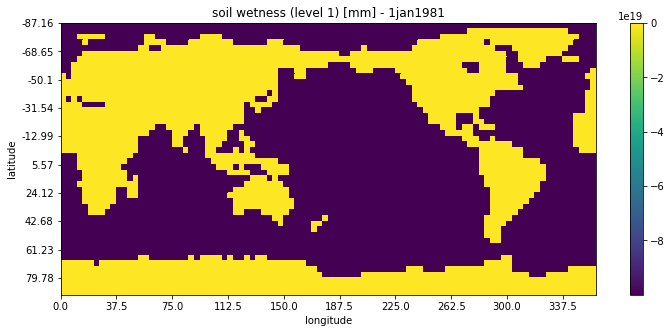

In [8]:
altitude_step = 0
if result_zeds > 1:
    altitude_step = altitude_widget.value

grads_plot.grads_plot(metadata, data, result_zeds, time_step, result_type, altitude_step).show()